## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
keras.__version__

'3.6.0'

## Import Dataset

In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [7]:
dataset.shape

(10000, 14)

In [8]:
dataset.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


## Creating independent and dependent variables dataset (X, y)

In [ ]:
# dataset.iloc[:, 3:13] ==> All rows and columns from index 3 to index 12
# dataset.iloc[:, 13] ==> All rows and columns indexed as 13

In [9]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [10]:
X.shape

(10000, 10)

In [11]:
y.shape

(10000,)

In [14]:
# X.head()
X[0:5]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [17]:
# y.head()
y[0:5]

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Create dummy variables of columns `Gender` and `Geography` (X)

In [18]:
gender = pd.get_dummies(X['Gender'], drop_first=True)
geography = pd.get_dummies(X["Geography"], drop_first=True)

In [19]:
print(type(gender))
print(type(geography))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [20]:
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [21]:
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


## Concatenate dummy variables (`geography, gender`) in `X`

In [22]:
X = pd.concat([X, geography, gender], axis=1)

In [23]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False


## Drop original `Geography` and `Gender` columns (`X`)

In [24]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [25]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


## Splitting the `X, y` into the Train set and Test set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [29]:
X_train[0:2]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True


In [30]:
X_test[0:2]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,True,False,False
898,523,40,2,102967.41,1,1,0,128702.10,False,False,False


In [31]:
y_train[0:2]

7389    0
9275    0
Name: Exited, dtype: int64

In [32]:
y_test[0:2]

9394    0
898     1
Name: Exited, dtype: int64

## Feature Scaling (`X_train, X_test`)

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
print( X_train[0:2] )

[[ 0.16958176 -0.46460796  0.00666099 -1.21571749  0.8095029   0.64259497
  -1.03227043  1.10643166 -0.5698444   1.74309049 -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 -0.00631193 -0.92159124  0.64259497
   0.9687384  -0.74866447  1.75486502 -0.57369368  0.91601335]]


In [38]:
print( X_test[0:2] )

[[-0.55204276 -0.36890377  1.04473698  0.8793029  -0.92159124  0.64259497
   0.9687384   1.61085707  1.75486502 -0.57369368 -1.09168714]
 [-1.31490297  0.10961719 -1.031415    0.42972196 -0.92159124  0.64259497
  -1.03227043  0.49587037 -0.5698444  -0.57369368 -1.09168714]]


## Building the ANN Model

**_Initializing the ANN_**

In [50]:
ann_classifier = Sequential()
ann_classifier

<Sequential name=sequential_1, built=False>

**_Adding the input layer and the first hidden layer_**

In [51]:
ann_classifier.add( Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_shape=(11,)) )

**_Adding the second hidden layer_**

In [52]:
ann_classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

**_Adding the output layer_**

In [53]:
ann_classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

**_Summary of ANN Classifier_**

In [54]:
print( ann_classifier.summary() )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [55]:
print(len(ann_classifier.layers))

3


## Training the ANN Model

**_Compiling the ANN_**

In [56]:
ann_classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

**_Fitting the ANN to the training set_**

In [57]:
model_history = ann_classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=50)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3849 - loss: 0.9842 - val_accuracy: 0.6588 - val_loss: 0.6481
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7092 - loss: 0.6137 - val_accuracy: 0.7944 - val_loss: 0.5484
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8015 - loss: 0.5244 - val_accuracy: 0.8023 - val_loss: 0.5123
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8079 - loss: 0.4952 - val_accuracy: 0.8065 - val_loss: 0.4916
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8148 - loss: 0.4783 - val_accuracy: 0.8065 - val_loss: 0.4778
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8190 - loss: 0.4701 - val_accuracy: 0.8107 - val_loss: 0.4678
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8144 - loss: 0.4603 - val_accuracy: 0.8148 - val_loss: 0.4602
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8203 - loss: 0.4442 - val_accuracy: 0.

In [58]:
model_history

In [59]:
print( ann_classifier.summary() )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

None


In [61]:
print(model_history.history)

{'accuracy': [0.5032655596733093, 0.7495801448822021, 0.8018286824226379, 0.8064937591552734, 0.8113453984260559, 0.8173166513442993, 0.8189960718154907, 0.8195558786392212, 0.8214219212532043, 0.8225415349006653, 0.8242209553718567, 0.8253405690193176, 0.8260869383811951, 0.8251539468765259, 0.8268333673477173, 0.8273931741714478, 0.8283261656761169, 0.8296324014663696, 0.8286994099617004, 0.8316850066184998, 0.8318716287612915, 0.8320581912994385, 0.8333644270896912, 0.8339242339134216, 0.8328046202659607, 0.8344840407371521, 0.835603654384613, 0.8372830748558044, 0.8402687311172485, 0.839895486831665, 0.8400821089744568, 0.8417615294456482, 0.8430677652359009, 0.8447471261024475, 0.8454935550689697, 0.8458667397499084, 0.8488523960113525, 0.8499720096588135, 0.8523978590965271, 0.8523978590965271, 0.8520246148109436, 0.8531442284584045, 0.8538906574249268, 0.8542638421058655, 0.8538906574249268, 0.8559432625770569, 0.8565030694007874, 0.8561298847198486, 0.8565030694007874, 0.857249

In [62]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [68]:
print(len(model_history.history['accuracy']))
print()
print(model_history.history['accuracy'])

50

[0.5032655596733093, 0.7495801448822021, 0.8018286824226379, 0.8064937591552734, 0.8113453984260559, 0.8173166513442993, 0.8189960718154907, 0.8195558786392212, 0.8214219212532043, 0.8225415349006653, 0.8242209553718567, 0.8253405690193176, 0.8260869383811951, 0.8251539468765259, 0.8268333673477173, 0.8273931741714478, 0.8283261656761169, 0.8296324014663696, 0.8286994099617004, 0.8316850066184998, 0.8318716287612915, 0.8320581912994385, 0.8333644270896912, 0.8339242339134216, 0.8328046202659607, 0.8344840407371521, 0.835603654384613, 0.8372830748558044, 0.8402687311172485, 0.839895486831665, 0.8400821089744568, 0.8417615294456482, 0.8430677652359009, 0.8447471261024475, 0.8454935550689697, 0.8458667397499084, 0.8488523960113525, 0.8499720096588135, 0.8523978590965271, 0.8523978590965271, 0.8520246148109436, 0.8531442284584045, 0.8538906574249268, 0.8542638421058655, 0.8538906574249268, 0.8559432625770569, 0.8565030694007874, 0.8561298847198486, 0.8565030694007874, 0.857249498367309

In [69]:
print(model_history.history['loss'])

[0.8343533873558044, 0.5842009782791138, 0.5244889855384827, 0.4958852231502533, 0.4762584865093231, 0.46276015043258667, 0.45275917649269104, 0.44525691866874695, 0.43929824233055115, 0.43438297510147095, 0.4302423298358917, 0.426522821187973, 0.42285722494125366, 0.4200546145439148, 0.41727277636528015, 0.4146983325481415, 0.41213133931159973, 0.4098174273967743, 0.4076729416847229, 0.40585851669311523, 0.40372249484062195, 0.40162408351898193, 0.3999049961566925, 0.39825788140296936, 0.3967767059803009, 0.395336389541626, 0.393971711397171, 0.39253225922584534, 0.391167551279068, 0.389599472284317, 0.3882274329662323, 0.38675329089164734, 0.3853473365306854, 0.3834765553474426, 0.38164713978767395, 0.3797258138656616, 0.3777906596660614, 0.37591639161109924, 0.37417101860046387, 0.3725625276565552, 0.3708251714706421, 0.36899036169052124, 0.36712491512298584, 0.365227609872818, 0.36339959502220154, 0.3617190420627594, 0.3599757254123688, 0.35822418332099915, 0.3565360903739929, 0.35

In [70]:
print(model_history.history['val_accuracy'])

[0.6588413715362549, 0.7943960428237915, 0.8023476004600525, 0.806512713432312, 0.806512713432312, 0.8106777667999268, 0.8148428797721863, 0.8137069344520569, 0.8133282661437988, 0.8148428797721863, 0.8133282661437988, 0.8140856027603149, 0.8159788250923157, 0.8171147108078003, 0.8174933791160583, 0.8152214884757996, 0.8148428797721863, 0.8171147108078003, 0.8182506561279297, 0.8171147108078003, 0.8178720474243164, 0.8186293244361877, 0.8186293244361877, 0.8186293244361877, 0.8205225467681885, 0.8216584920883179, 0.8224157691001892, 0.8243089914321899, 0.8254449367523193, 0.826959490776062, 0.8280954360961914, 0.8292313814163208, 0.8299886584281921, 0.8307459354400635, 0.8303672671318054, 0.8330178260803223, 0.8345323801040649, 0.8322604894638062, 0.8318818807601929, 0.8322604894638062, 0.8326391577720642, 0.8360469341278076, 0.8375615477561951, 0.8375615477561951, 0.837182879447937, 0.8375615477561951, 0.8398333787918091, 0.8394547700881958, 0.8413479924201965, 0.8409693241119385]


In [71]:
print(model_history.history['val_loss'])

[0.6481436491012573, 0.5484104752540588, 0.5123388171195984, 0.49158287048339844, 0.4778223931789398, 0.46783676743507385, 0.46015599370002747, 0.45444732904434204, 0.4499698877334595, 0.446346640586853, 0.44327178597450256, 0.4402640759944916, 0.4379802942276001, 0.4355415999889374, 0.43344178795814514, 0.43150821328163147, 0.42975807189941406, 0.42783933877944946, 0.4260971248149872, 0.4244571924209595, 0.4226682484149933, 0.4207344353199005, 0.4189002811908722, 0.41735854744911194, 0.4153901934623718, 0.4138116240501404, 0.41214102506637573, 0.41068604588508606, 0.40915122628211975, 0.4075639843940735, 0.40602588653564453, 0.4047759175300598, 0.402945876121521, 0.4012952148914337, 0.39944788813591003, 0.39721015095710754, 0.3954031765460968, 0.39404523372650146, 0.3924872875213623, 0.3906025290489197, 0.3886694312095642, 0.3867841064929962, 0.3847111761569977, 0.3829471468925476, 0.3809473216533661, 0.3791053295135498, 0.3772982954978943, 0.37568920850753784, 0.37418684363365173, 0.

## Summarize `model_history.history` for `accuracy`

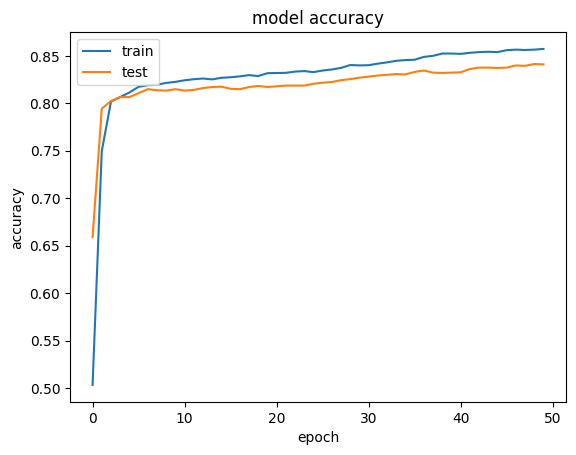

In [72]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Summarize `model_history.history` for `loss`

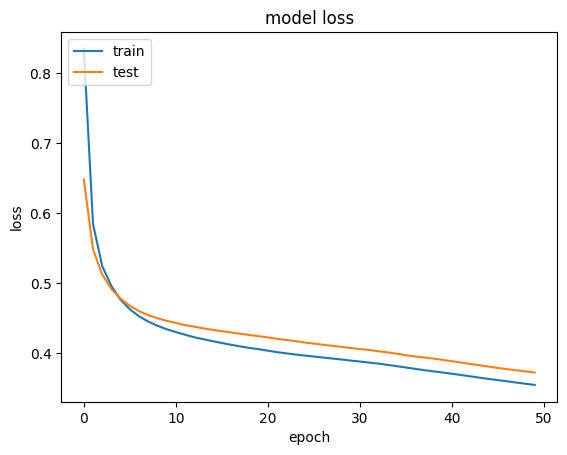

In [73]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Predicting the ANN Model

In [74]:
y_pred = ann_classifier.predict(X_test)
y_pred.shape

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(2000, 1)

In [76]:
y_pred[0:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [77]:
y_pred = (y_pred > 0.5)
y_pred.shape

(2000, 1)

## Confusion Matrix

In [79]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 213  192]]


## Accuracy Score

In [80]:
ac = accuracy_score(y_test, y_pred)
print(ac)

0.8575


## ANN Summary

In [82]:
print( ann_classifier.summary() )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

None
